<a href="https://colab.research.google.com/github/leorfer23/FdeA/blob/master/CB_Leonel_Fernandez_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Leonel Fernandez CB 2020 Individual Assignment

#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import os
#print(os.listdir("../input"))
import spacy
import random 
from collections import Counter #for counting
import seaborn as sns #for visualization

In [2]:
# Configuring the language for NLP
nlp = spacy.load('en')

In [ ]:
# Importing the  dataset
from google.colab import files
uploaded = files.upload()

Saving tweets_nikekaepernick.csv to tweets_nikekaepernick.csv


In [7]:
# All the first part I followed some of the kernels on Kaggle , combining what I saw on the 6 authors that shared their analysis.
# On the second part im using some Tweets analysis shared in other blogs analyzing different types of tweets.
df = pd.read_csv(io.BytesIO(uploaded['tweets_nikekaepernick.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.head()

,tweet_lenght,tweet_favs_count,tweet_full_text,tweet_id,tweet_is_quote_bool,tweet_lang,tweet_rts_count,user_bio,user_favs_count,user_followers_count,user_id,user_name,user_statuses_count,user_verified
0,166,0,White ppl almost killing themselves just to bu...,x1037852811340464128,False,en,0,NaN,2035,559,x292503552,Dynasdee,44042,False
1,23,0,@madmoneymill Nike’s all I wear <U+0001F937><U...,x1037852910137237509,False,en,1,"Stay humble, and strive. USMC veteran. LLL©<U+...",33523,227,x935742289225355264,The_Phenom07,25593,False
2,29,2,@johnrich @Nike Do the same with your socks.. ...,x1037852694541520896,False,en,0,NaN,12,0,x481584622,guadalupelineck,17,False
3,12,1,@SNFonNBC I blame NIKE,x1037852896593735681,False,en,0,NaN,1757,75,x68105970,Jreeezy2000,5946,False
4,280,20,"@CBSNews hey hey hey,\r\nALL COLLEGES MATTER.\...",x1037852654930673664,False,en,3,"Business/Data Analyst, Educator, Authoress, AO...",12713,491,x4220625275,woodson_kb,18269,False


In [11]:
# Starting the process of cleaning texts/words
text = df.tweet_full_text
text_combined = str(text)
doc = nlp(text_combined)


In [15]:
# Example of how it looks
for token in doc:
    print(token.text, token.pos_)


0 NUM
        SPACE
White PROPN
ppl PROPN
almost ADV
killing VERB
themselves PRON
just ADV
to ADP
bu VERB
... PUNCT

 SPACE
1 NUM
        SPACE
@madmoneymill ADP
Nike PROPN
’s PUNCT
all DET
I PRON
wear VERB
< X
U+0001F937><U ADJ
... PUNCT

 SPACE
2 NUM
        SPACE
@johnrich NOUN
@Nike PROPN
Do AUX
the DET
same ADJ
with ADP
your DET
socks NOUN
.. PUNCT
... PUNCT

 SPACE
3 NUM
                                   SPACE
@SNFonNBC X
I PRON
blame VERB
NIKE PROPN

 SPACE
4 NUM
        SPACE
@CBSNews PROPN
hey INTJ
hey INTJ
hey,\r\nALL NUM
COLLEGES NOUN
MATTER.\ PUNCT
... PUNCT

                                SPACE
... PUNCT
                       
 SPACE
11413 NUM
    SPACE
We PRON
have AUX
what PRON
we PRON
need VERB
. PUNCT
  SPACE
# SYM
JustDoIt PROPN
https://t.co/ PROPN
... PUNCT

 SPACE
11414 NUM
    SPACE
Even ADV
the DET
best ADJ
can VERB
take VERB
an DET
L!!\n\n#MGK PROPN
# NOUN
RapDevi PROPN
... PUNCT

 SPACE
11415 NUM
    SPACE
Serena PROPN
! PUNCT
All DET
Serena PROPN
, PUNCT
9 N

In [17]:
for ent in doc.ents:
    print(ent.text,ent.label_)
    
spacy.displacy.render(doc, style='ent',jupyter=True)


0 CARDINAL
1 CARDINAL
Nike ORG
2 CARDINAL
3 CARDINAL
NIKE ORG
4 CARDINAL
11413 DATE
11414 DATE
RapDevi MONEY
11415 DATE
All Serena PERSON
9 CARDINAL
10 CARDINAL
11416 DATE
11417 DATE
Nike ORG
Justdoit PERSON
Length PERSON
11418 DATE
dtype PERSON


In [52]:
doc = nlp(str(df.tweet_full_text))

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

0 0 NUM CD ROOT d False False
                SPACE _SP       False False
White White PROPN NNP compound Xxxxx True False
ppl ppl PROPN NNP nsubj xxx True False
almost almost ADV RB advmod xxxx True True
killing kill VERB VBG ROOT xxxx True False
themselves -PRON- PRON PRP dobj xxxx True True
just just ADV RB advmod xxxx True True
to to ADP IN prep xx True True
bu bu VERB VB pobj xx True False
... ... PUNCT : punct ... False False

 
 SPACE _SP  
 False False
1 1 NUM CD ROOT d False False
                SPACE _SP       False False
@madmoneymill @madmoneymill ADP IN compound @xxxx False False
Nike Nike PROPN NNP ROOT Xxxx True False
’s ’s PUNCT '' punct ’x False True
all all DET DT nsubj xxx True True
I -PRON- PRON PRP nsubj X True True
wear wear VERB VBP relcl xxxx True False
< < X XX punct < False False
U+0001F937><U u+0001f937><u ADJ JJ ROOT X+ddddXddd><X False False
... ... PUNCT : punct ... False False

 
 SPACE _SP  
 False False
2 2 NUM CD nummod d False False
                SP

In [18]:
for token in doc:
    print(token.text, token.lemma_)


0 0
               
White White
ppl ppl
almost almost
killing kill
themselves -PRON-
just just
to to
bu bu
... ...

 

1 1
               
@madmoneymill @madmoneymill
Nike Nike
’s ’s
all all
I -PRON-
wear wear
< <
U+0001F937><U u+0001f937><u
... ...

 

2 2
               
@johnrich @johnrich
@Nike @Nike
Do do
the the
same same
with with
your -PRON-
socks sock
.. ..
... ...

 

3 3
                                                                     
@SNFonNBC @snfonnbc
I -PRON-
blame blame
NIKE NIKE

 

4 4
               
@CBSNews @CBSNews
hey hey
hey hey
hey,\r\nALL hey,\r\nall
COLLEGES colleges
MATTER.\ MATTER.\
... ...

                                
                               
... ...
                       
                        

11413 11413
       
We -PRON-
have have
what what
we -PRON-
need need
. .
   
# #
JustDoIt JustDoIt
https://t.co/ https://t.co/
... ...

 

11414 11414
       
Even even
the the
best good
can can
take take
an an
L!!\n\n#MGK L!!\n\n#MGK
# #
RapD

In [19]:
spacy.displacy.render(doc, style='dep',jupyter=True)


In [39]:
import advertools as adv
%config InlineBackend.figure_format = 'retina' # high resolution plotting
import matplotlib.pyplot as plt
df.shape
# We have 11417 tweets

(11418, 14)

In [25]:
# Analyzing hashtags
hashtag_summary = adv.extract_hashtags(df['tweet_full_text'])
hashtag_summary.keys()
hashtag_summary['overview']


{'hashtags_per_post': 2.309073392888422,
 'num_hashtags': 26365,
 'num_posts': 11418,
 'unique_hashtags': 6284}

In [35]:
hashtag_summary['hashtags'][:10]


[[], [], [], [], ['#igotnothing'], [], [], [], [], []]

In [34]:
hashtag_summary['hashtags_flat'][:10]


['#igotnothing',
 '#nike',
 '#nfl',
 '#nike',
 '#kapernick',
 '#thebachelor',
 '#girlsundpanzer',
 '#garupan',
 '#justdoit',
 '#nike']

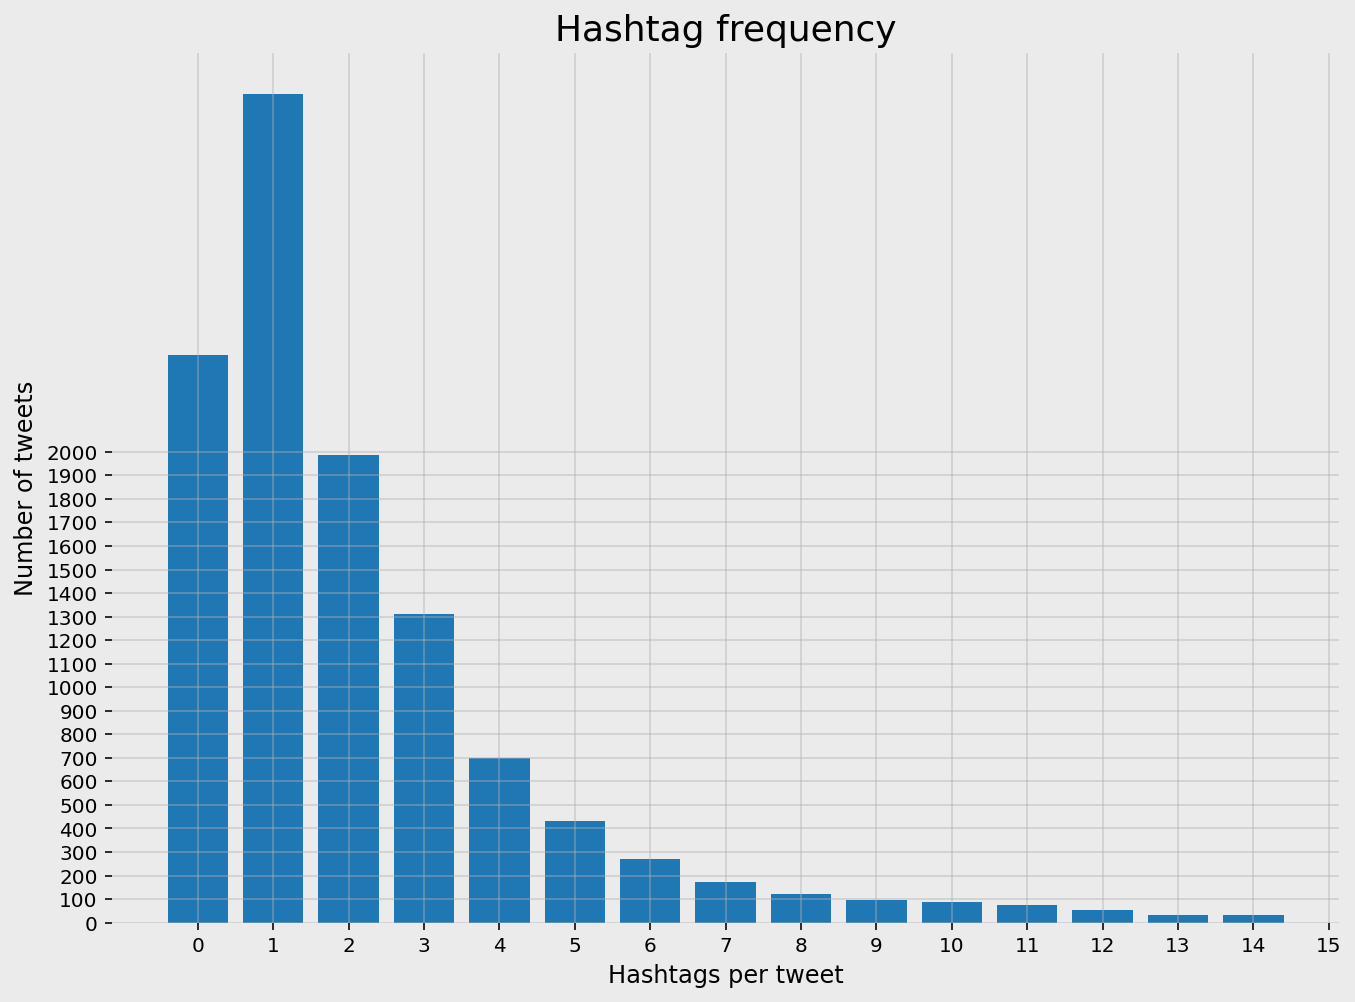

In [40]:
plt.figure(facecolor='#ebebeb', figsize=(11, 8))
plt.bar([x[0] for x in hashtag_summary['hashtag_freq'][:15]],
        [x[1] for x in hashtag_summary['hashtag_freq'][:15]])
plt.title('Hashtag frequency', fontsize=18)
plt.xlabel('Hashtags per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(16))
plt.yticks(range(0, 2100, 100))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [44]:
emoji_summary = adv.extract_emoji(df['tweet_full_text'])
emoji_summary.keys()
emoji_summary['overview']


{'emoji_per_post': 0.279208267647574,
 'num_emoji': 3188,
 'num_posts': 11418,
 'unique_emoji': 422}

In [43]:
emoji_summary['top_emoji'][:20]


[('😂', 535),
 ('🤣', 177),
 ('✔️', 136),
 ('🔥', 122),
 ('🏈', 80),
 ('❤️', 69),
 ('💯', 50),
 ('💙', 49),
 ('🇺🇸', 48),
 ('😭', 46),
 ('✊🏾', 42),
 ('👟', 39),
 ('✊🏽', 37),
 ('👀', 37),
 ('🤔', 31),
 ('💩', 30),
 ('👏', 29),
 ('😎', 28),
 ('🙌🏽', 28),
 ('⭐', 28)]

In [54]:
import re 
import tweepy 
 
from textblob import TextBlob

In [65]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['tweet_full_text'].apply(polarity)
df['subjectivity'] = df['tweet_full_text'].apply(subjectivity)



In [73]:
# As we can see here -> Soem tweets are miss labeled like for exampled 6849.
# Data is pretty messy, people are often ironic in tweeter also. Overall I think it looks pretty ok.
# Anti Nike
df[['tweet_full_text', 'polarity', 'subjectivity']].sort_values(by=['polarity']).head(20)

,tweet_full_text,polarity,subjectivity
3472,#MuhammadAli truly was fighting an evil system...,-1.0,1.000000
929,"Another Wedge issue, ginned up Culture War\r\n...",-1.0,1.000000
4886,Al Bundy sold shoes also because he was a terr...,-1.0,1.000000
5710,#NikeBoycott Burning your socks and shoes is n...,-1.0,1.000000
1327,Buddy wanted to say the n word so bad lmfaooo ...,-1.0,0.666667
9324,...waiting for angry people to burn their TVs?...,-1.0,1.000000
10431,Y’all just Fucking do it!!! #justdoit #Nike #T...,-1.0,0.800000
3109,President Trump: Nike's Colin Kaepernick Ad Se...,-1.0,1.000000
5060,Laptops have virus protection to prevent nasty...,-1.0,1.000000
10191,Fucking feed me the triggered rage!!! Feed it ...,-1.0,0.800000


In [75]:
# Pro Nike
df[['tweet_full_text', 'polarity', 'subjectivity']].sort_values(by=['polarity'], ascending=False).head(20)

,tweet_full_text,polarity,subjectivity
8000,Best marketing move they ever could have done ...,1.0,0.30
3810,@plasticjesusart @Kaepernick7 Fucking brillian...,1.0,1.00
11182,"When @MaajidNawaz thought ""#TakeAKnee"", meant ...",1.0,1.00
2649,@w_terrence Great ad- just NOT with Colin Kaep...,1.0,0.75
10106,This is the best one yet. #AlwaysSunny #DENNIS...,1.0,0.30
1451,"Ohmigod, this is awesome...\r\n\r\n#Nike #Nike...",1.0,1.00
7987,"@realDonaldTrump Equality, fairness, and be th...",1.0,0.30
6122,@Kaepernick7 @Nike This is not sacrificing any...,1.0,0.60
6108,Can someone please tell them burning their own...,1.0,1.00
8849,#Nike\nYou do this every time. Every damn time...,1.0,0.30


In [83]:
df_sampled = df.sample(frac=0.2, replace=False, random_state=1)


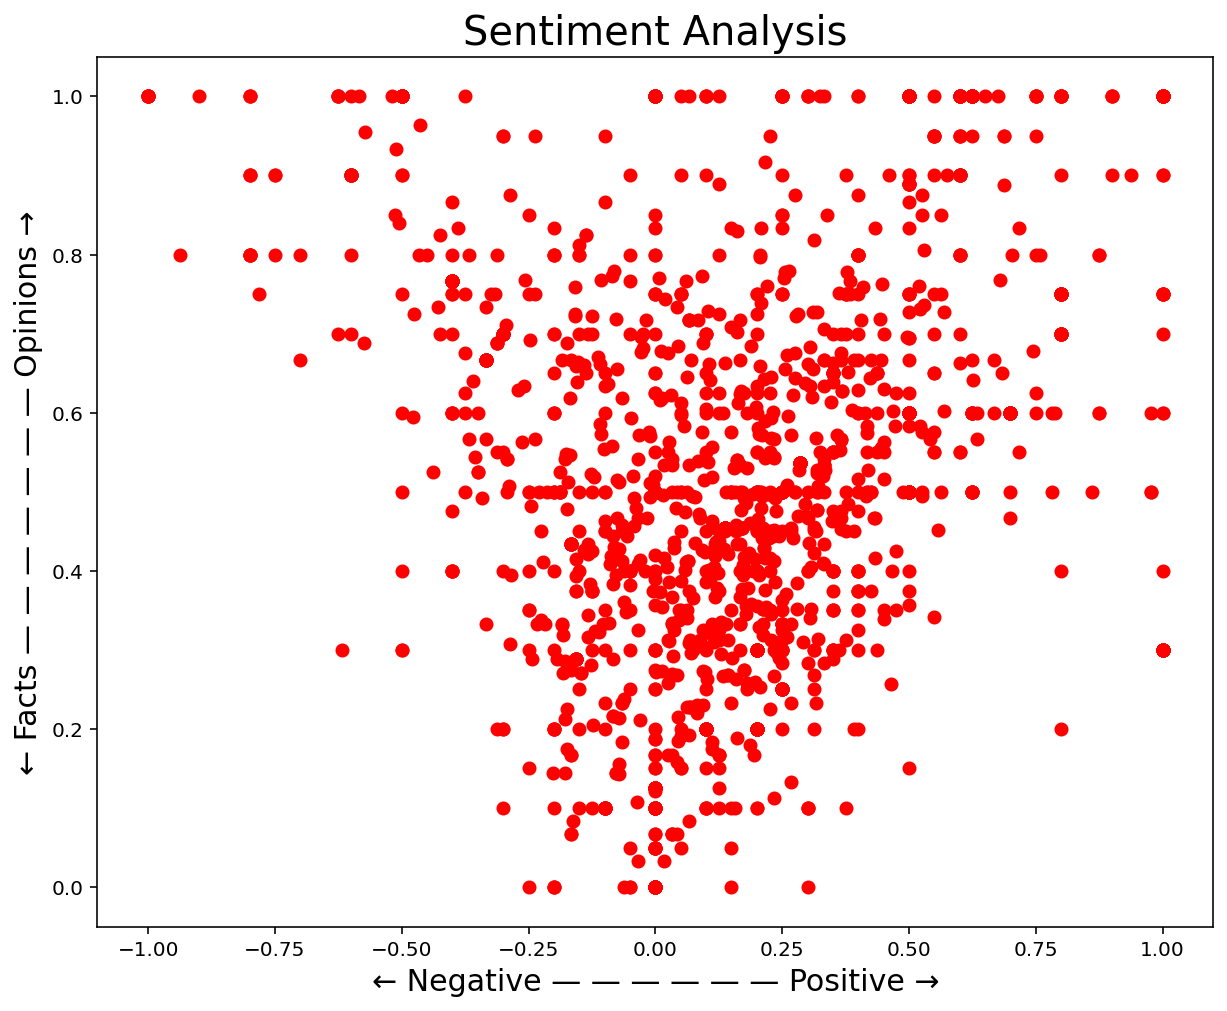

In [84]:
# Let’s plot the results
 # We can observe here that there is not a clear winner in terms of positive or negative opinions towards nike. Our sentiment analysis positions the big majority of tweets in the middle.
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(df_sampled.index):
 x = df_sampled.polarity.loc[Tweets]
 y = df_sampled.subjectivity.loc[Tweets]
 plt.scatter(x, y, color='Red')
 
 
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()

In [89]:
def ratio(x):
  if x > 0:
    return 1
  elif x == 0:
   return 0
  else:
   return -1

df['analysis'] = df['polarity'].apply(ratio)
df['analysis'].value_counts()


 1    4974
 0    4193
-1    2251
Name: analysis, dtype: int64

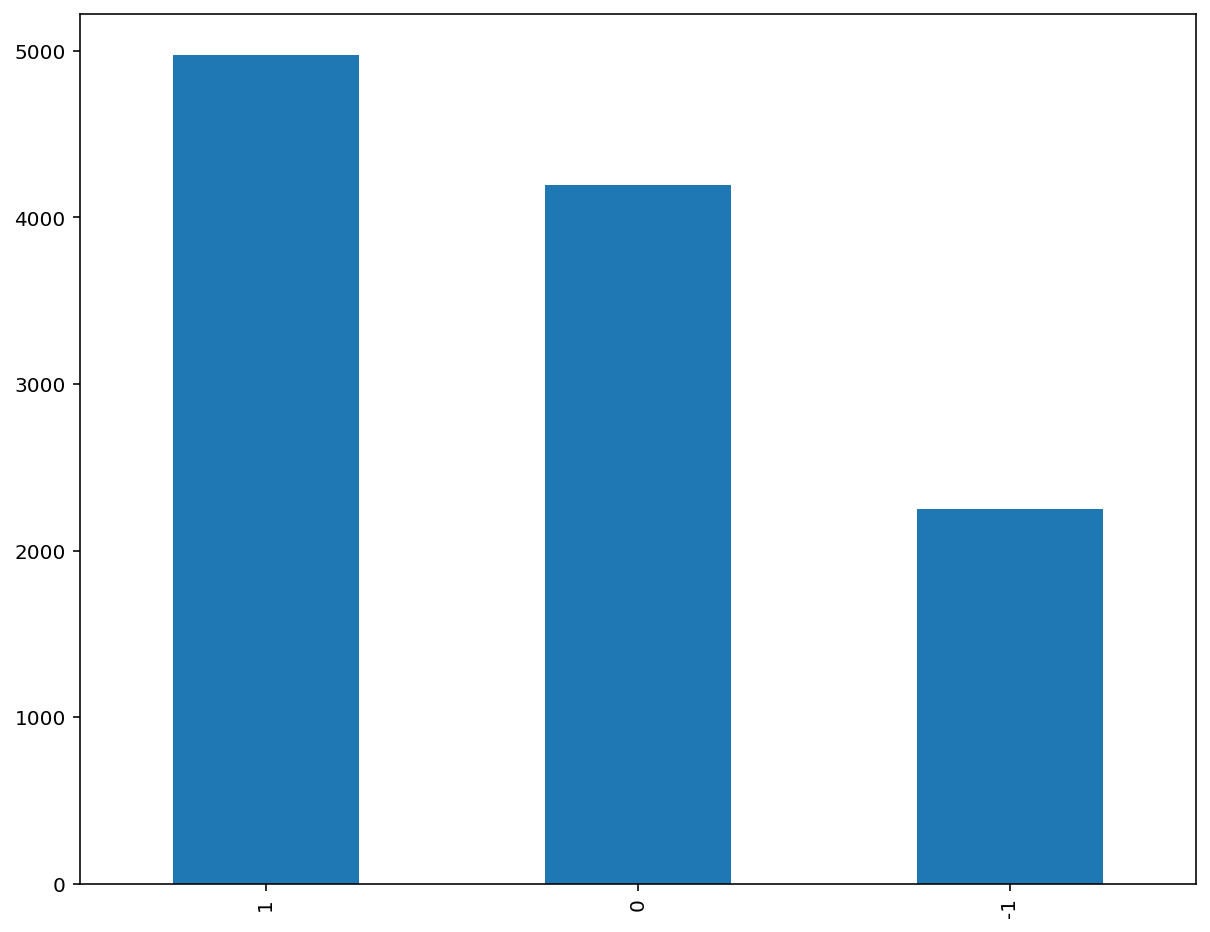

In [92]:
# Plotting
df['analysis'].value_counts().plot(kind = 'bar')
plt.show()

# Overall there seem to be more positive comments towards Nike.

In [ ]:
# The problem with this analysis (that im aware of) is that its extremely difficult to evaluate if the POSITIVE sentiment analysis is towards NIKE or it is towards the army or trump for example.
# Example: Lets support the army! -> This tweet does not contain any hatred against nike but its clearly anti-nike, in our analysis this is labeled as PRO NIKE.

#Conclusions:

''' 
I did not know that this campaign was SO controversial. After reading more information and analysis it seems that people got really angry at the disrispect to the country's flag and army. 

Overall from the post-analysis and the revenue shared by Nike to its stakeholders, it seems that the campaign was profitable and that the customer base and people overall support Nike for being reckless 
with showing that they have strength and core values.
Also, the most recent events of #BLM and all the events happenning worldwide seem to support Nike's stance and we are fortunate to have companies actually caring about this stuff!

Regarding the dataset, if you dont have much experience with NLP I think twitter is one of the places you want to avoid. The data is super messy.

My first approach was to label manually 500-1000 tweets to train a classification model. I even had a hard time classifying tweets manually because of its nature, and because it seems that people 
express themselves super weird. Irony that if you do not know of the topic you do not understand, weird acronyms, and twitter specific language. After spending 30 min to classify the first 100 hundred 
tweets I decided to take a new approach.

Using the Textblob library was a good idea and the library contains a sentiment polarity method that seems to classify correctly. There are some misslabels from what i've seen, but overall it seems to work.
From the ~11k tweets, +60% where either positive or neutral (understading the positive issue, as explained before on this cell) which means that the reception was good.

Most importantly I wanted to highlight the virality of standing a position like this, there are some marketing experts that say that being in the word of mouth is always a positive signal. Some brands,
actually look for controversial stuff regularly because its good branding, despite that lots of people might hate it. 

Moving away from the data, I think it was a really good move for Nike, but I do not support the ways. I think that disrespecting the flag was not necesary, there could have been another moments to show
the discontent for the police or racism. Like for example before starting the game (after the ceremony) or in the press conference. By choosing that moment, it generated unnecesary conflict.

Maybe they did that on purpose to generate more controversy! Related to the topics seen in class, Nike is a clear example of not only signing athletes for what they do , but also for what they represent.

And this is one of the reasons that Nike is one of the most loved brands in the world. They take risks, and they support what they beleieve in.

'''
